<a href="https://colab.research.google.com/github/Sniperpilot16/DSPS_MRichardson/blob/master/Extra_Credit/Data/EC_Music_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import scipy as sp
import matplotlib as pl
import matplotlib.pyplot as pl
import numpy as np
import seaborn as sb

import sklearn as skl
from sklearn import cluster
from sklearn.manifold import TSNE


# Get the data from Kaggle

Original Data is from this link:

https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018#top2018.csv


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
ls

drive/  sample_data/


In [5]:
cd "drive/My Drive"

/content/drive/My Drive


In [6]:
ls

'11 16 2019 Set List.gdoc'                 'Lyrics 2.gdoc'
'2013 NYLT Michael Evaluation.pdf'         'Merit Badges.gdoc'
 Application.gdoc                          'MR. K college essay questions.gdoc'
'A video Goes with this one.mp3'           'My Life story (Thus far).gdoc'
'Brandan And Josh Combine.m4a'             'My Studio Wishlist .gsheet'
'Brother Leader Educator Bylaws.gdoc'      'New Folder'/
'Choir leadership essay.gdoc'              'Notes from DSPS.gdoc'
 CISC106/                                  'Physics Buoyancy graph.gsheet'
'Colab Notebooks'/                          Poetry/
 College/                                  'Post Moment Lyrics.gdoc'
'College Essay ideas.gdoc'                 'Renaissance Physics.gdoc'
'Cool Audition Material.gdoc'               root/
'Demetrius first person .gdoc'             'Senior Assassins'/
 dsps/                                     'Songs We Need to Cover.gdoc'
'DSPS Quizzes.gdoc'                        'Storm story.gdoc'
'Eagle scout'/

In [0]:
top2018 = pd.read_csv("top2018.csv")

In [8]:
top2018.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [9]:
top2018.shape

(100, 16)

# Get Relavent Columns

Within the original data they include columns such as "danceability" but for the purposes of my analysis this is not relavant. especially since the parameters for their data under those columns is not explicitly discussed.  

In [10]:
top2018_relavent = top2018[['name', 'artists','key', 'loudness', 'mode', 'tempo', 'duration_ms', 'time_signature']]
top2018_relavent

,name,artists,key,loudness,mode,tempo,duration_ms,time_signature
0,God's Plan,Drake,7.0,-9.211,1.0,77.169,198973.0,4.0
1,SAD!,XXXTENTACION,8.0,-4.880,1.0,75.023,166606.0,4.0
2,rockstar (feat. 21 Savage),Post Malone,5.0,-6.090,0.0,159.847,218147.0,4.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,8.0,-8.011,1.0,140.124,221440.0,4.0
4,In My Feelings,Drake,1.0,-5.833,1.0,91.030,217925.0,4.0
...,...,...,...,...,...,...,...,...
95,Rewrite The Stars,Zac Efron,10.0,-7.005,1.0,125.046,217440.0,4.0
96,I Miss You (feat. Julia Michaels),Clean Bandit,3.0,-6.318,1.0,105.076,205748.0,4.0
97,No Brainer,DJ Khaled,0.0,-4.706,1.0,135.702,260000.0,5.0
98,Dusk Till Dawn - Radio Edit,ZAYN,11.0,-6.593,0.0,180.043,239000.0,4.0


In [112]:
top2018_renamed = top2018_relavent.rename(columns={'name':'Title', 'artists':'Artist','key':'Key','loudness':'Decibels', 'mode':'Major or Minor','tempo':'Tempo', 'duration_ms':'Length','time_signature':'Meter'})
# retitling rows so that they make more sense
top2018_renamed.head(10)

,Title,Artist,Key,Decibels,Major or Minor,Tempo,Length,Meter
0,God's Plan,Drake,7.0,-9.211,1.0,77.169,198973.0,4.0
1,SAD!,XXXTENTACION,8.0,-4.880,1.0,75.023,166606.0,4.0
2,rockstar (feat. 21 Savage),Post Malone,5.0,-6.090,0.0,159.847,218147.0,4.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,8.0,-8.011,1.0,140.124,221440.0,4.0
4,In My Feelings,Drake,1.0,-5.833,1.0,91.030,217925.0,4.0
5,Better Now,Post Malone,10.0,-5.843,1.0,145.028,231267.0,4.0
6,I Like It,Cardi B,5.0,-3.998,0.0,136.048,253390.0,4.0
7,One Kiss (with Dua Lipa),Calvin Harris,9.0,-3.240,0.0,123.994,214847.0,4.0
8,IDGAF,Dua Lipa,7.0,-5.975,1.0,97.028,217947.0,4.0
9,FRIENDS,Marshmello,9.0,-2.384,0.0,95.079,202621.0,4.0


In [0]:
# All parameters excluding artist, song title, major or minor, and Meter
top2018_scaled = top2018_renamed[['Key', 'Decibels', 'Tempo', 'Length']]
# 2-D Projection of the Key and Decibel Level
key_decibels = top2018_renamed[['Key', 'Decibels']]

# 2-D Projection of the Key and the Tempo
key_tempo = top2018_renamed[['Key', 'Tempo']]

# 2-D Projection of the Key and Length of Song
key_length = top2018_renamed[['Key', 'Length']]

# 2-D Projection of Decibel Level and Tempo
decibels_tempo = top2018_renamed[['Decibels', 'Tempo']]

# 2-D Projection of Decibel Level and Length
decibels_length = top2018_renamed[['Decibels', 'Length']]

# 2-D Projection of the Tempo and Length
tempo_length = top2018_renamed[['Tempo', 'Length']]

Since no two parameters are related to eachother, based on my knowledge of music I am making 6 - 2-D projections of the 4 parameters Key, Decibel Level, Tempo and Length, since the parameters Major or Minor and Meter consist of less than 3 values each. No useful information would come from plotting those

**NOTE**: Used clustering to find comparisons

# Tempo vs Length

In [0]:
tempo_lengthtwo = skl.manifold.TSNE(n_components = 2).fit_transform(tempo_length)

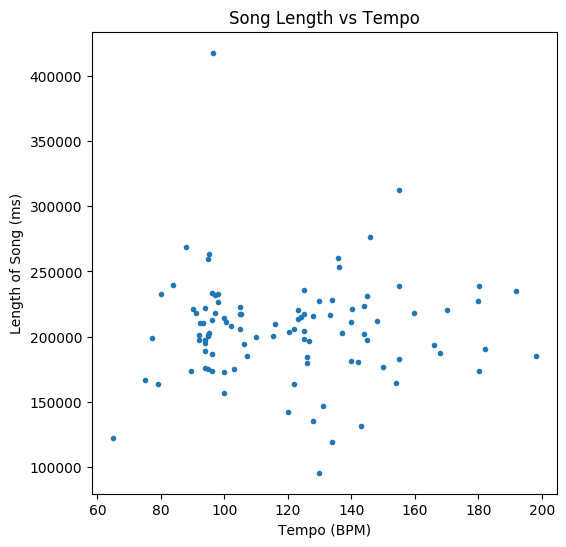

In [57]:
pl.figure(figsize = (6,6))
#pl.plot(tempo_lengthtwo[:, 0], tempo_lengthtwo[:, 1], '.')
pl.plot(tempo_length['Tempo'], tempo_length['Length'], '.')
pl.xlabel('Tempo (BPM)')
pl.ylabel('Length of Song (ms)')
pl.title('Song Length vs Tempo')
pl.style.use('classic')

**Figure 1**: Plot of Song length versus tempo. 

In [0]:
def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print(icvar)
    return icvar

5922.0439453125

4955.462646484375

4805.413146972656

4745.757064819336

4723.429672241211

4713.5355014801025

4709.608893632889

4704.364753007889

4698.91144490242

4696.719743013382



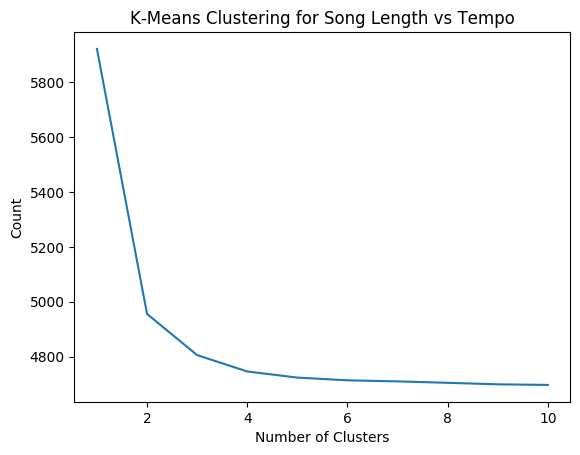

In [61]:
tl = []
for i in range(1, 11):
  c = cluster.k_means(tempo_lengthtwo, i)
  tl.append(calICVar(tempo_lengthtwo,c[1]))
  print("")
pl.plot(range(1, 11), tl)
pl.title("K-Means Clustering for Song Length vs Tempo")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')
pl.style.use('default')

**Figure 2**: K-Means clustering of 

Text(0, 0.5, 'Length of Song (ms)')

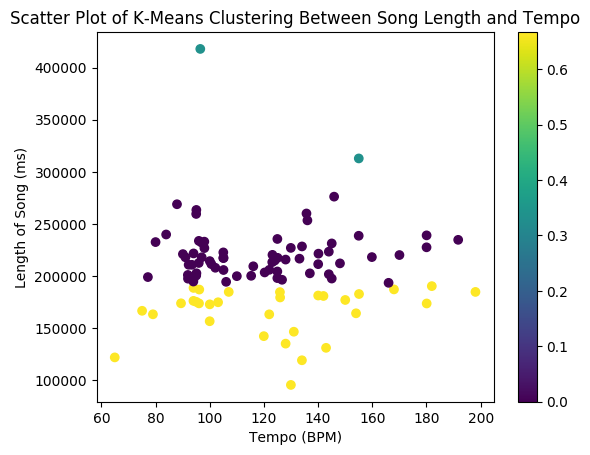

In [111]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(tempo_length)
pl.scatter(tempo_length['Tempo'], tempo_length['Length'], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering Between Song Length and Tempo")
pl.xlabel('Tempo (BPM)')
pl.ylabel('Length of Song (ms)')

#Key vs Decibel Level

In [0]:
key_decibelstwo = skl.manifold.TSNE(n_components = 2).fit_transform(key_decibels)

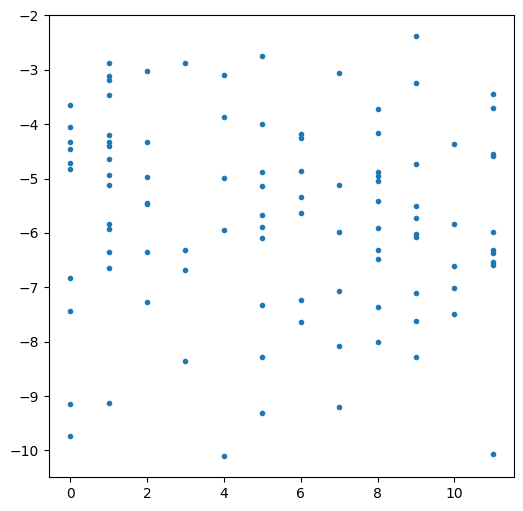

In [64]:
pl.figure(figsize = (6, 6))
pl.plot(key_decibels['Key'], key_decibels['Decibels'], '.')

2630.69677734375

1000.6419372558594

699.00634765625

685.3175354003906

680.7950325012207

650.0506591796875

637.4051933288574

632.4032926559448

628.389063835144

612.1240363121033



Text(0, 0.5, 'Count')

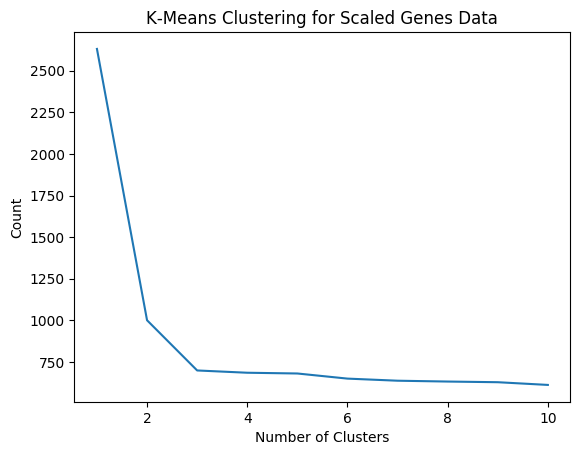

In [65]:
kd = []
for i in range(1, 11):
  c = cluster.k_means(key_decibelstwo, i)
  kd.append(calICVar(key_decibelstwo,c[1]))
  print("")
pl.plot(range(1, 11), kd)
pl.title("K-Means Clustering for Scaled Genes Data")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')

Text(0, 0.5, 'Decibel level (DB)')

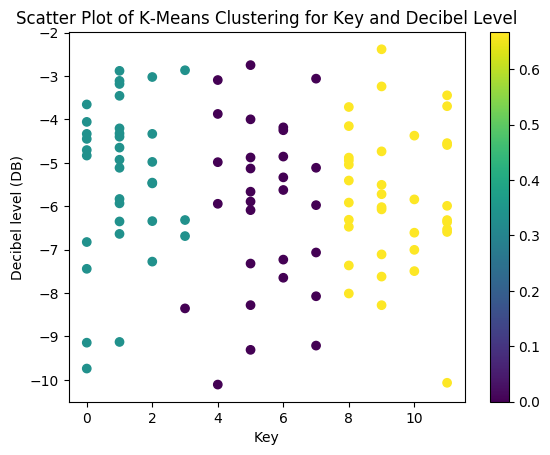

In [117]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(key_decibels)
pl.scatter(key_decibels['Key'], key_decibels['Decibels'], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering for Key and Decibel Level")
pl.xlabel('Key')
pl.ylabel('Decibel level (DB)')

# Key vs Tempo

In [0]:
key_tempotwo = skl.manifold.TSNE(n_components = 2).fit_transform(key_tempo)

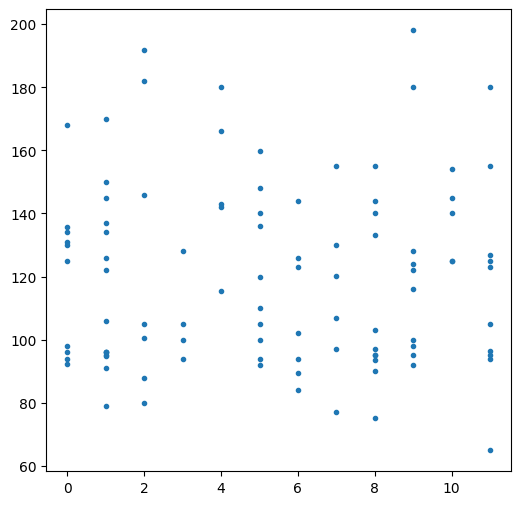

In [68]:
pl.figure(figsize = (6, 6))
pl.plot(key_tempo['Key'], key_tempo['Tempo'], '.')

9032.0703125

8097.156539916992

8030.321334838867

8006.069972991943

7995.652004241943

7993.400323867798

7977.739545345306

7973.645024299622

7971.916020393372

7970.570661067963



Text(0, 0.5, 'Count')

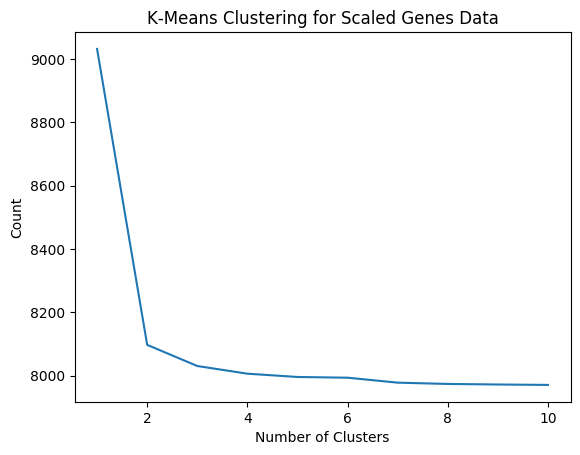

In [69]:
kt = []
for i in range(1, 11):
  c = cluster.k_means(key_tempotwo, i)
  kt.append(calICVar(key_tempotwo,c[1]))
  print("")
pl.plot(range(1, 11), kt)
pl.title("K-Means Clustering for Scaled Genes Data")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')

Text(0.5, 1.0, 'Scatter Plot of K-Means Clustering in Two Dimensions')

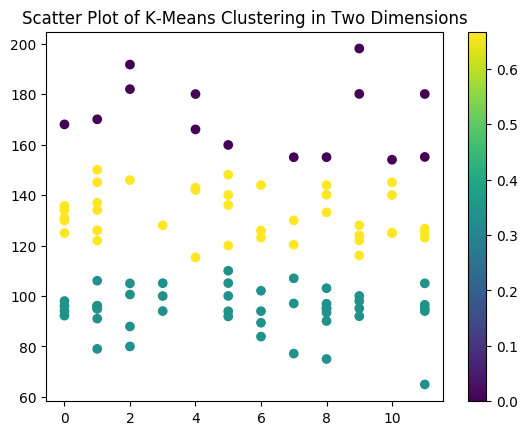

In [70]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(key_tempo)
pl.scatter(key_tempo['Key'], key_tempo['Tempo'], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering in Two Dimensions")

#Key vs Length of Song

In [0]:
key_lengthtwo = skl.manifold.TSNE(n_components = 2).fit_transform(key_length)

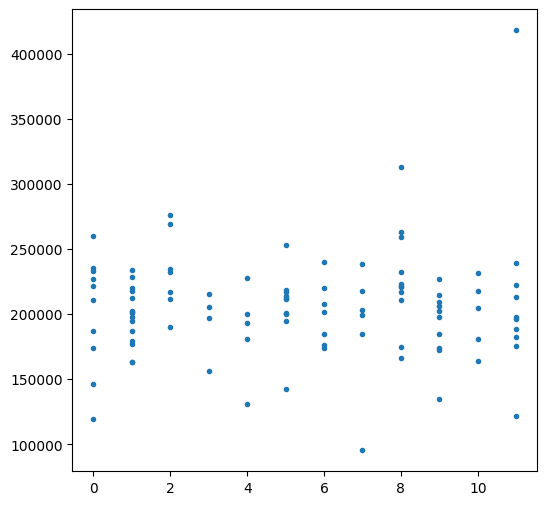

In [72]:
pl.figure(figsize = (6, 6))
pl.plot(key_length['Key'], key_length['Length'], '.')


3456.494140625

2501.4024047851562

2352.931854248047

2294.9874992370605

2273.5465812683105

2263.4620151519775

2259.753779411316

2253.806100845337

2249.3137607574463

2247.3017411231995



Text(0, 0.5, 'Count')

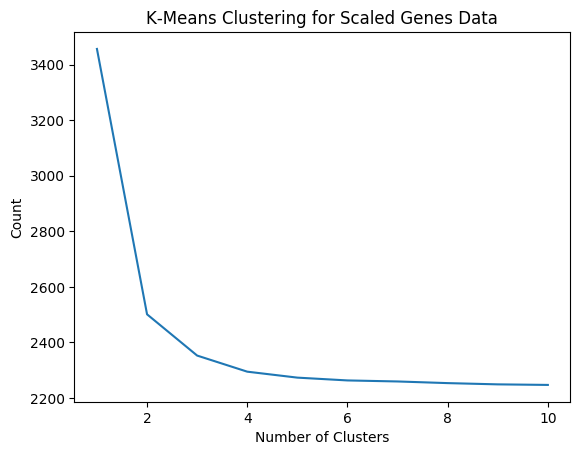

In [73]:
kl = []
for i in range(1, 11):
  c = cluster.k_means(key_lengthtwo, i)
  kl.append(calICVar(key_lengthtwo,c[1]))
  print("")
pl.plot(range(1, 11), kl)
pl.title("K-Means Clustering for Scaled Genes Data")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')

Text(0.5, 1.0, 'Scatter Plot of K-Means Clustering in Two Dimensions')

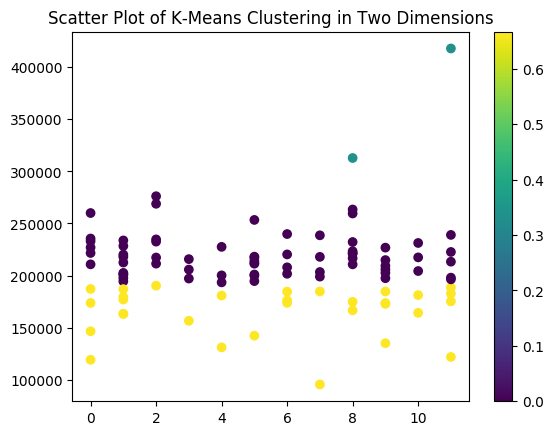

In [74]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(key_length)
pl.scatter(key_length['Key'], key_length['Length'], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering in Two Dimensions")

#Decibel Level vs Tempo

In [0]:
decibels_tempotwo = skl.manifold.TSNE(n_components = 2).fit_transform(decibels_tempo)

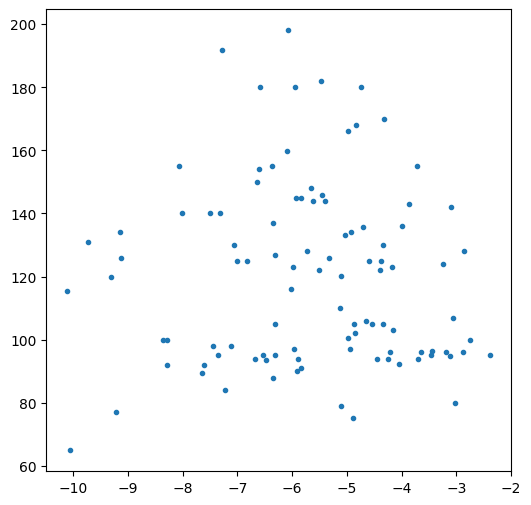

In [76]:
pl.figure(figsize = (6,6))
pl.plot(decibels_tempo['Decibels'], decibels_tempo['Tempo'], '.')

4320.046875

1369.79931640625

1225.7726287841797

1154.5767288208008

1130.347885131836

1112.7633438110352

1105.381721496582

1098.893699645996

1096.0624408721924

1092.4275360107422



Text(0, 0.5, 'Count')

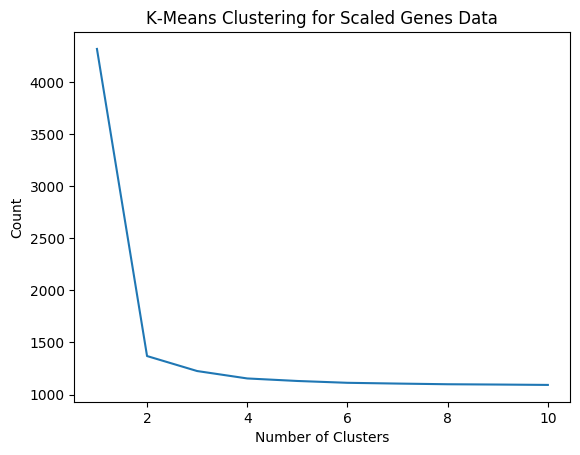

In [77]:
dt = []
for i in range(1, 11):
  c = cluster.k_means(decibels_tempotwo, i)
  dt.append(calICVar(decibels_tempotwo,c[1]))
  print("")
pl.plot(range(1, 11), dt)
pl.title("K-Means Clustering for Scaled Genes Data")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')

Text(0.5, 1.0, 'Scatter Plot of K-Means Clustering in Two Dimensions')

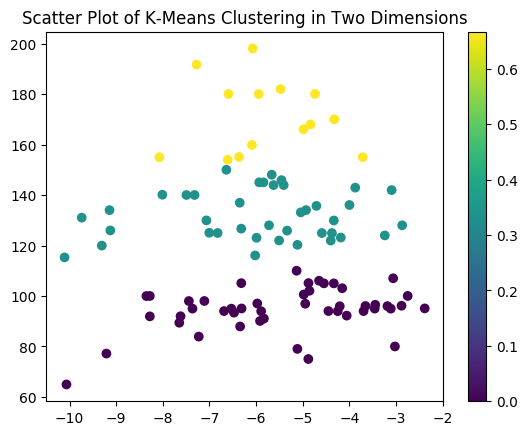

In [78]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(decibels_tempo)
pl.scatter(decibels_tempo['Decibels'], decibels_tempo['Tempo'], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering in Two Dimensions")

#Decibel Level vs Length of Song

In [0]:
decibels_lengthtwo = skl.manifold.TSNE(n_components = 2).fit_transform(decibels_length)

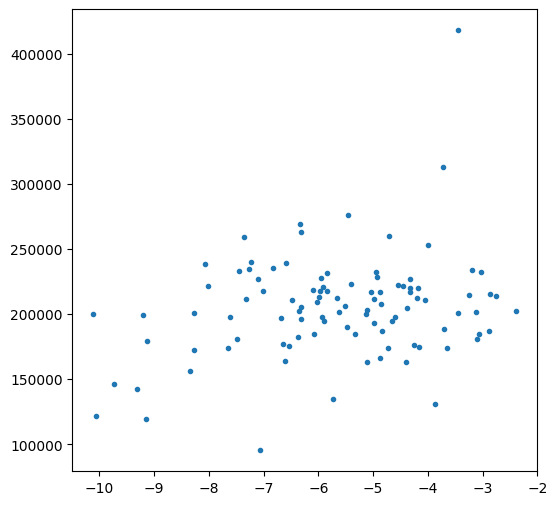

In [80]:
pl.figure(figsize = (6,6))
pl.plot(decibels_length['Decibels'], decibels_length['Length'], '.')

2714.224609375

1561.4337158203125

1376.427719116211

1293.026870727539

1265.6507034301758

1249.107032775879

1232.7629194259644

1226.3001248836517

1220.0604627132416

1217.67644572258



Text(0, 0.5, 'Count')

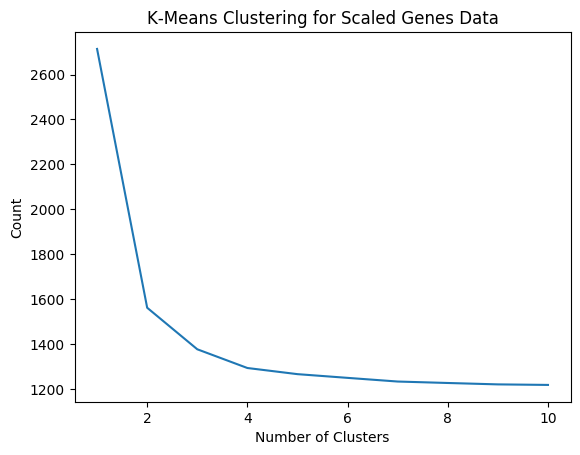

In [81]:
dl = []
for i in range(1, 11):
  c = cluster.k_means(decibels_lengthtwo, i)
  dl.append(calICVar(decibels_lengthtwo,c[1]))
  print("")
pl.plot(range(1, 11), dl)
pl.title("K-Means Clustering for Scaled Genes Data")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')

Text(0.5, 1.0, 'Scatter Plot of K-Means Clustering in Two Dimensions')

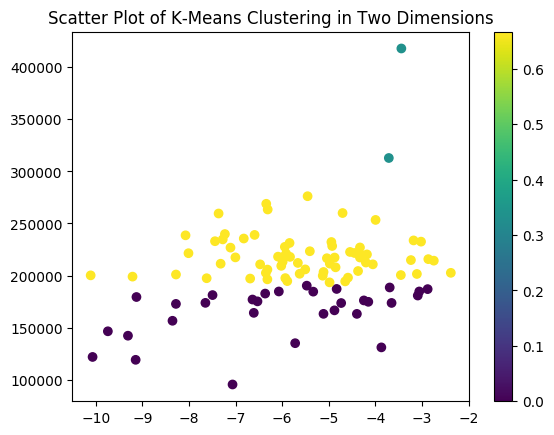

In [82]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(decibels_length)
pl.scatter(decibels_length['Decibels'], decibels_length['Length'], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering in Two Dimensions")

# Clustering of all sets

In [0]:
top2018_scaledtwo = skl.manifold.TSNE(n_components = 2).fit_transform(top2018_scaled)

5546.56494140625

3422.1837158203125

3095.18603515625

2954.6743774414062

2908.7074584960938

2886.5935668945312

2867.0115966796875

2854.8487854003906

2844.640121459961

2840.0872650146484



Text(0, 0.5, 'Count')

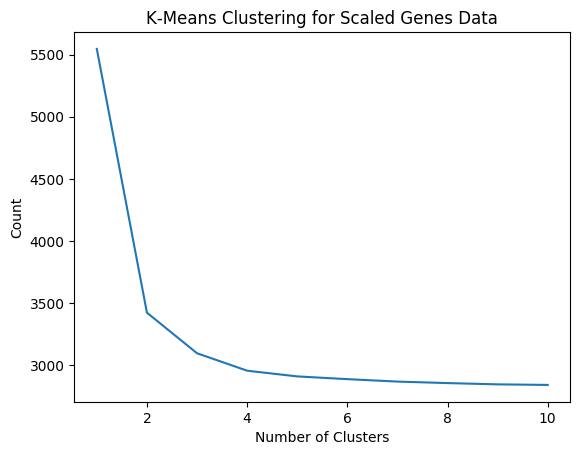

In [114]:
tst = []
for i in range(1, 11):
  c = cluster.k_means(top2018_scaledtwo, i)
  tst.append(calICVar(top2018_scaledtwo,c[1]))
  print("")
pl.plot(range(1, 11), tst)
pl.title("K-Means Clustering for Scaled Genes Data")
pl.xlabel('Number of Clusters')
pl.ylabel('Count')

Text(0.5, 1.0, 'Scatter Plot of K-Means Clustering Between All Parameters')

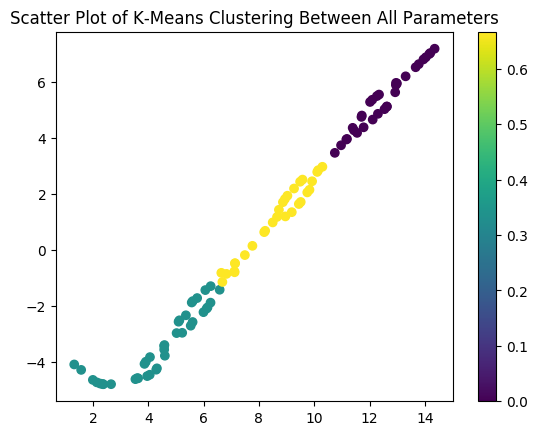

In [116]:
geneclustersKM = cluster.KMeans(n_clusters=3).fit(top2018_scaledtwo)
pl.scatter(top2018_scaledtwo[:, 0], top2018_scaledtwo[:, 1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.colorbar();
pl.title("Scatter Plot of K-Means Clustering Between All Parameters")


#Analysis of Clustering

After completing clustering for each set of two parameters, conclusions can be made on some parameters and how much they contribute to creating the "ideal song". One of these parameters that seemed to not contribute much based on K-Means clustering was the key. Part of this could be related to the fact that there are only 12 different keys. Because of this, there is not much variation in data in comparison to the length of each song, which is unique to each song. When clustered with other parameters, the clusters are very geometric, based entirely off of one of the other parameters creating straight lines with a relatively equal amount of points. 


On the other side of this, there were some intersting correlations that arose from the comparisons. In the Tempo vs Length of song clustering, there was a dense group of points between aproximately 90 BPM and 150 BPM, and 200000 ms and 250000 ms. This would make sense considering the attention span that people like to listen to a singular song for as well as how fast they like to move when listening to music. In otherwords, a typical dance beat is approximately 120 BPM, music that stays around this tempo is what most people consider "uplifting" music. 

All other pairs of parameters came up with inconclusive clusters. 

# Key Histogram 

In [0]:
key = top2018_renamed[['Key']]

In [84]:
key

,Key
0,7.0
1,8.0
2,5.0
3,8.0
4,1.0
...,...
95,10.0
96,3.0
97,0.0
98,11.0


In [85]:
key['Key'].value_counts()

1.0     15
8.0     11
11.0    10
0.0     10
9.0     10
5.0     10
6.0      7
2.0      7
7.0      6
4.0      5
10.0     5
3.0      4
Name: Key, dtype: int64

In [86]:
#renaming each value from the numberical value of key to string value

key.loc[key['Key']==0, 'Key'] = 'C'
key.loc[key['Key']==1 ,'Key']='Db'    
key.loc[key['Key']==2 ,'Key']='D'    
key.loc[key['Key']==3 ,'Key']='Eb'    
key.loc[key['Key']==4 ,'Key']='E'    
key.loc[key['Key']==5 ,'Key']='F'    
key.loc[key['Key']==6 ,'Key']='Gb'    
key.loc[key['Key']==7 ,'Key']='G'    
key.loc[key['Key']==8 ,'Key']='Ab'    
key.loc[key['Key']==9 ,'Key']='A'    
key.loc[key['Key']==10 ,'Key']='Bb' 
key.loc[key['Key']==11 ,'Key']='B'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [87]:
key

,Key
0,G
1,Ab
2,F
3,Ab
4,Db
...,...
95,Bb
96,Eb
97,C
98,B


Text(0.5, 1.0, 'Amount of Songs with Specific Keys from Spotify Top 100 from 2018')

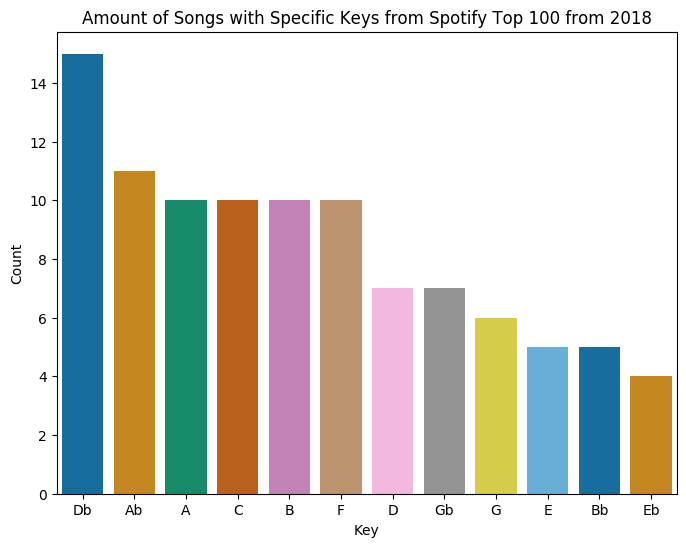

In [88]:
pl.figure(figsize = (8,6))
keys_counts  = key['Key'].value_counts()
dataframe_key_counts = pd.DataFrame(keys_counts)
sb.barplot(dataframe_key_counts.index, dataframe_key_counts.Key, palette= 'colorblind')
pl.xlabel('Key')
pl.ylabel('Count')
pl.title('Amount of Songs with Specific Keys from Spotify Top 100 from 2018')

# Decibels Histogram

In [89]:
decibels = top2018_renamed[['Decibels']]
decibels

,Decibels
0,-9.211
1,-4.880
2,-6.090
3,-8.011
4,-5.833
...,...
95,-7.005
96,-6.318
97,-4.706
98,-6.593


Text(0.5, 1.0, 'Amount of Songs Between Certain Decibel Ranges')

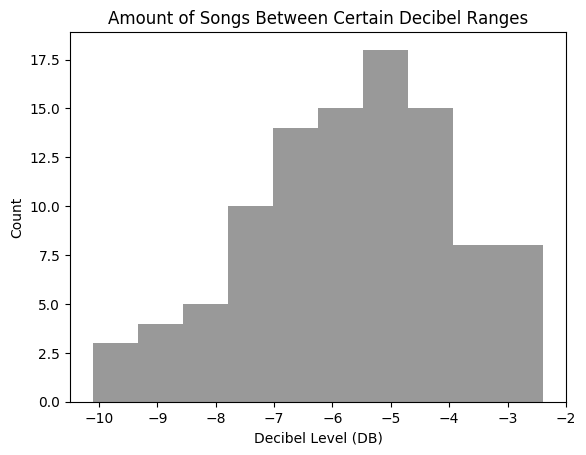

In [101]:
sb.distplot(decibels['Decibels'], bins = 10, kde = False, hist = True, color = 'black')
sb.set_context()
pl.xlabel('Decibel Level (DB)')
pl.ylabel('Count')
pl.title('Amount of Songs Between Certain Decibel Ranges')

# Tempo Histogram

In [91]:
tempo = top2018_renamed[['Tempo']]
tempo

,Tempo
0,77.169
1,75.023
2,159.847
3,140.124
4,91.030
...,...
95,125.046
96,105.076
97,135.702
98,180.043


Text(0.5, 1.0, 'Amount of Songs Between Certain Tempo Ranges')

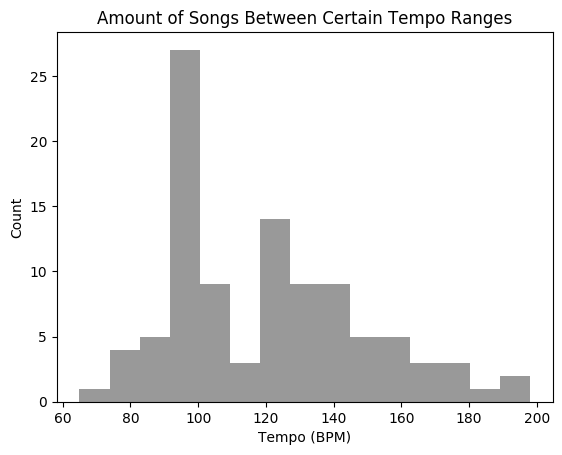

In [92]:
sb.distplot(tempo['Tempo'], bins = 15, kde = False, hist = True, color = 'black')
sb.set_context()
pl.xlabel('Tempo (BPM)')
pl.ylabel('Count')
pl.title('Amount of Songs Between Certain Tempo Ranges')

#Song Length Histogram

In [93]:
length = top2018_renamed[['Length']]
length

,Length
0,198973.0
1,166606.0
2,218147.0
3,221440.0
4,217925.0
...,...
95,217440.0
96,205748.0
97,260000.0
98,239000.0


Text(0.5, 1.0, 'Length of Songs Between Time Periods')

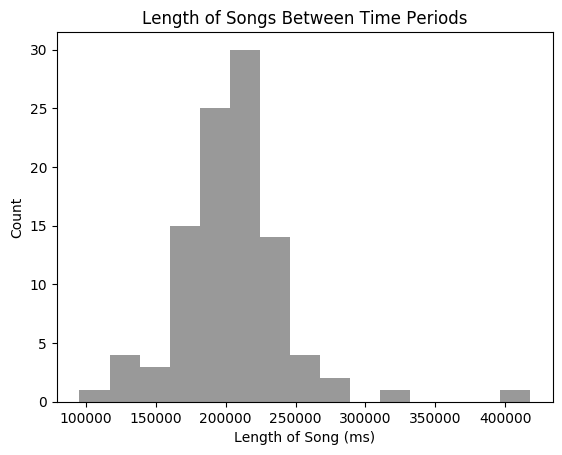

In [105]:
sb.distplot(length['Length'], bins = 15, kde = False, hist = True, color = 'Black')
sb.set_context()
pl.xlabel('Length of Song (ms)')
pl.ylabel('Count')
pl.title('Length of Songs Between Time Periods')

# Meter Histogram

In [95]:
meter = top2018_renamed[['Meter']]
meter

,Meter
0,4.0
1,4.0
2,4.0
3,4.0
4,4.0
...,...
95,4.0
96,4.0
97,5.0
98,4.0


Text(0.5, 1.0, 'Time Signature of Spotify Top 100 Songs')

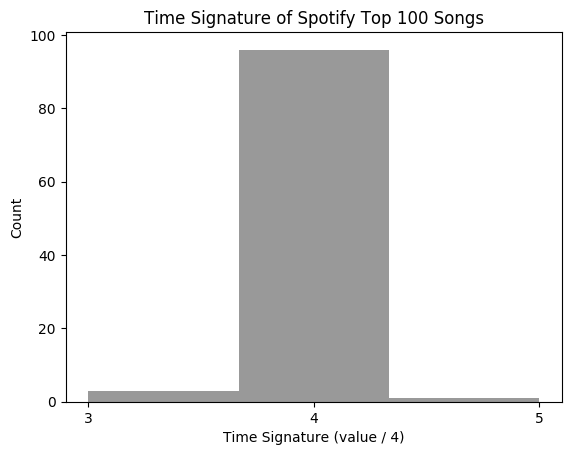

In [109]:
sb.distplot(meter['Meter'], bins = 3, kde = False, hist = True, color= 'black')
sb.set_context()
pl.xticks([3, 4, 5])
pl.xlabel('Time Signature (value / 4)')
pl.ylabel('Count')
pl.title('Time Signature of Spotify Top 100 Songs')

# Major Minor Histogram

In [97]:
major_minor = top2018_renamed[['Major or Minor']]
major_minor

,Major or Minor
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
95,1.0
96,1.0
97,1.0
98,0.0


In [98]:
major_minor.loc[major_minor['Major or Minor']==0, 'Major or Minor'] = 'Minor'
major_minor.loc[major_minor['Major or Minor']==1, 'Major or Minor'] = 'Major'
major_minor

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,Major or Minor
0,Major
1,Major
2,Minor
3,Major
4,Major
...,...
95,Major
96,Major
97,Major
98,Minor


In [0]:
major_minor2 = major_minor.rename(columns = {'Major or Minor':'Either'})

Text(0.5, 1.0, 'Amount of Songs That are Major or Minor')

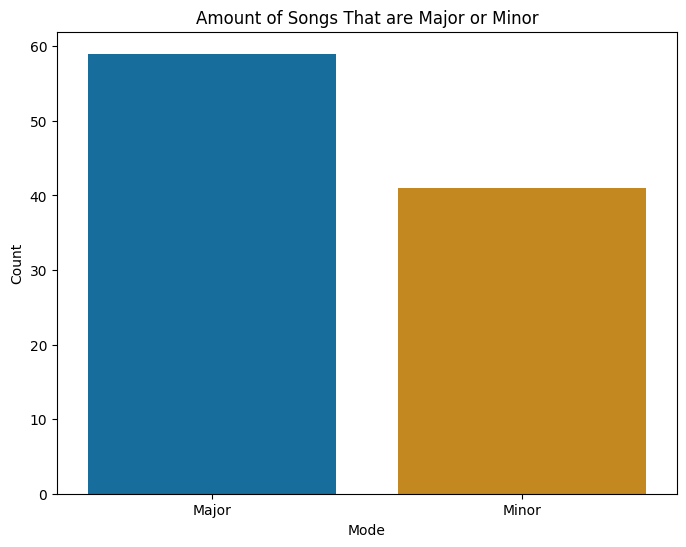

In [100]:
pl.figure(figsize = (8,6))
major_minor_counts  = major_minor2['Either'].value_counts()
dataframe_major_minor_counts = pd.DataFrame(major_minor_counts)
sb.barplot(dataframe_major_minor_counts.index, dataframe_major_minor_counts.Either, palette= 'colorblind')
pl.xlabel('Mode')
pl.ylabel('Count')
pl.title('Amount of Songs That are Major or Minor')

# The 'Ideal Song' Parameters

**Key**: Db

**Decibel Level**: ~-5 DB

**Tempo**: ~90 BPM

**Song Length**: 210000 ms (or about 3.5 min)

**Meter**: 4/4

**Major or Minor**: Major

